In [5]:
import pandas as pd
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt

In [6]:
# Example: Extracting and combining files from a ZIP
zipped_file_path = 'C:/Users/jjk/Downloads/names.zip'

with zipfile.ZipFile(zipped_file_path, 'r') as z:
    file_names = z.namelist()
    data_frames = []
    
    # Process files matching criteria (e.g., ending with '.txt')
    for file_name in file_names:
        if file_name.endswith('.txt'):
            with z.open(file_name) as file:
                df = pd.read_csv(BytesIO(file.read()), header=None, names=['Name', 'Gender', 'Count'])
                df['Year'] = int(file_name[3:7])  # Extract year from file name
                data_frames.append(df)

    # Combine all data
    baby_names_data = pd.concat(data_frames, ignore_index=True)

C:\Users\jjk\AppData\Local\Temp\ipykernel_11152\1743270382.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_trend = baby_names_data.groupby(['Year', 'Gender']).sum()['Count'].unstack()


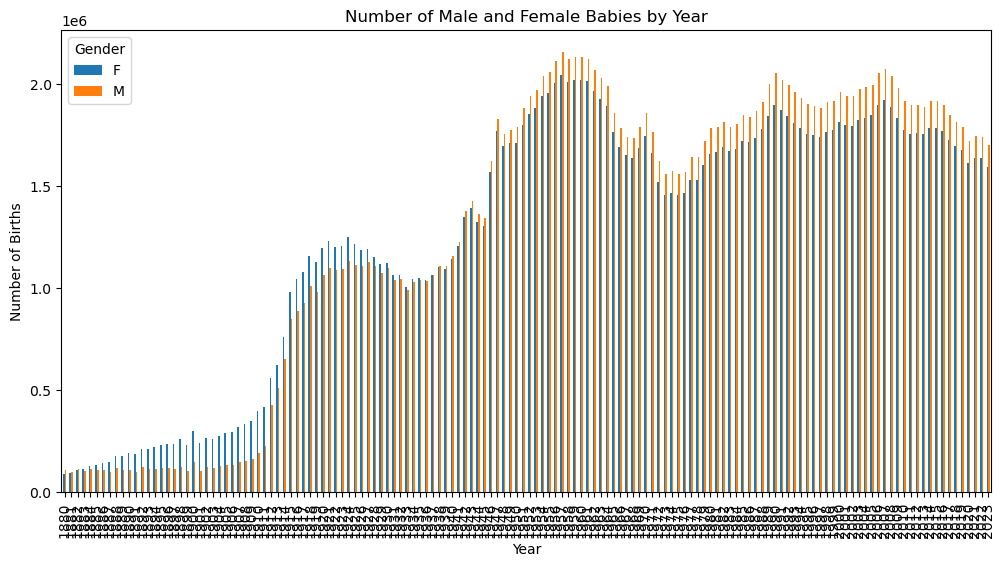

In [7]:
# Summarize by Year and Gender
gender_trend = baby_names_data.groupby(['Year', 'Gender']).sum()['Count'].unstack()

# Plotting
gender_trend.plot(kind='bar', figsize=(12, 6), title="Number of Male and Female Babies by Year")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

In [8]:
# Group by Name and find total counts across all years
top_names = baby_names_data.groupby('Name').sum().sort_values(by='Count', ascending=False).head(100)

# Print top names
print(top_names)

           Count    Year
Name                    
James    5250328  562032
John     5187975  562032
Robert   4862085  551940
Michael  4431942  510909
William  4194193  562032
...          ...     ...
Aaron     610436  466620
Brenda    610223  365731
Frances   598903  547930
Pamela    596281  340038
Willie    596072  529885

[100 rows x 2 columns]


C:\Users\jjk\AppData\Local\Temp\ipykernel_11152\2910027138.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_names = baby_names_data.groupby('Name').sum().sort_values(by='Count', ascending=False).head(100)
